In [1]:
import cv2
import pytesseract

In [2]:
def preprocess(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply threshold
    threshold = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return threshold

In [3]:
def extract_text(img):
    return pytesseract.image_to_string(img)

In [4]:
import google.generativeai as genai
from dotenv import load_dotenv
import os
load_dotenv()
genai.configure(api_key=os.getenv("API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Explain how AI works")

/home/anuzb50/Documents/recieptReader/Reciept-Reader/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


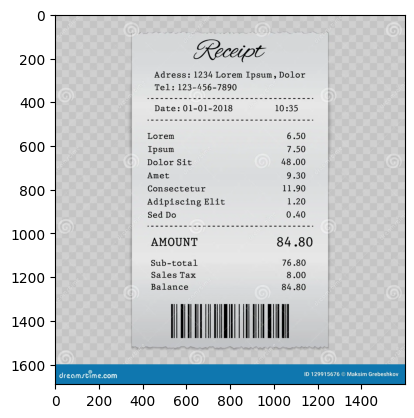

In [5]:
# image before preporcess
import matplotlib.pyplot as plt
image = plt.imread("test4.jpg")
plt.imshow(image)

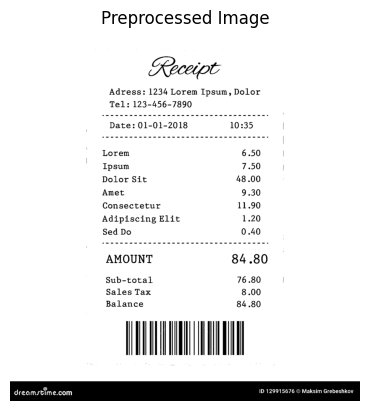

In [7]:

# Preprocess the image
_, processed_img = preprocess('test4.jpg')

# Plot the image
plt.imshow(processed_img, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [8]:
# extraction of the text from the image
extracted_text = extract_text(processed_img)
print(extracted_text)

Adress: 1234 Lorem Ipsum, Dolor
Tel: 123-456-7890

Date: 01-01-2018 10:35 |
ssesseenm ee eee ewe eee eee eee ew ee ewe eee ew ew ee A |
Lorem 6.50 |

| Ipsum 7.50 |
Dolor Sit 48 .00
Amet 9.30
Consectetur 11.90
Adipiscing Elit 1.20
Sed Do 0.40
AMOUNT 84 .80
Sub-total 76.80 |
Sales Tax 8.00
Balance 84 .80

dreamstime.com ID 129915676 © Maksim Grebeshkov



In [9]:
import json
def ai_extract(text):
    prompt = """ You are a reciept parser AI. I am going to provide you with text from a reciept and I want you to extract the following information in the this structure: {'total','bussiness','items':[{'name','price','quantity'}],'address'}"""
    response = model.generate_content(prompt + text)
    response_text = response.text.strip().replace("```json","").strip().replace("```","")
    try:
        response_json = json.loads(response_text)
    except json.JSONDecodeError as e:
        print(f"error Decoding JSON {e}")
        response_json = {"error": response.text}
        
    return response_json, 


In [10]:
print(ai_extract(extracted_text))

({'total': '84.80', 'bussiness': None, 'items': [{'name': 'Lorem', 'price': '6.50', 'quantity': None}, {'name': 'Ipsum', 'price': '7.50', 'quantity': None}, {'name': 'Dolor Sit', 'price': '48.00', 'quantity': None}, {'name': 'Amet', 'price': '9.30', 'quantity': None}, {'name': 'Consectetur', 'price': '11.90', 'quantity': None}, {'name': 'Adipiscing Elit', 'price': '1.20', 'quantity': None}, {'name': 'Sed Do', 'price': '0.40', 'quantity': None}], 'address': '1234 Lorem Ipsum, Dolor'},)
